In [36]:
import pandas as pd
df = pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [37]:
df2 = df.pivot_table(values="id", index="race", columns="signs_of_mental_illness",aggfunc="count")
df2

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [38]:
def mip(row):
    return(row[True]/(row[False]+row[True])*100)
df2["Mental Illness %"] = df2.apply(lambda row: mip(row),axis=1)
df2

signs_of_mental_illness,False,True,Mental Illness %
race,,,
A,69,24,25.806452
B,1114,184,14.175655
H,745,157,17.405765
N,64,14,17.948718
O,37,11,22.916667
W,1763,713,28.796446


In [39]:
df2["Mental Illness %"].idxmax(axis=0)

'W'

In [40]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True)
df["day_of_week"] = df['date'].dt.day_name()

In [41]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


In [42]:
df3 = df.pivot_table(values="id", index="day_of_week", aggfunc="count")
df3 = df3.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
df3

,id
day_of_week,
Monday,726
Tuesday,816
Wednesday,829
Thursday,810
Friday,761
Saturday,721
Sunday,753


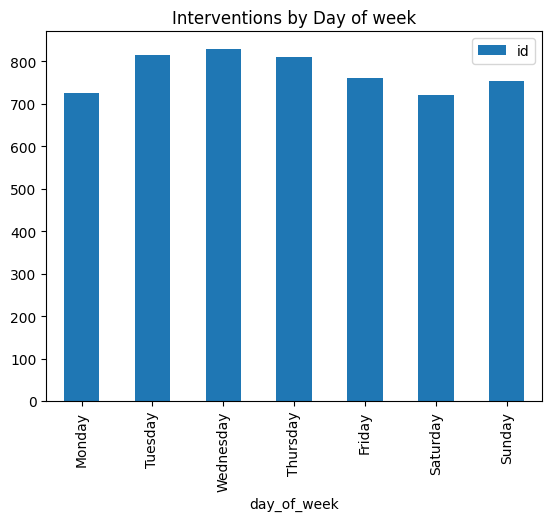

In [43]:
import matplotlib.pyplot as plt
plot = df3.plot(title="Interventions by Day of week",kind="bar")

In [48]:
import pandas as pd
states = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population",index_col=[2])
states = states[0]
states = states.rename(columns={"Census population, April 1, 2020 [1][2]":"population"})
states.index.name = "state"
states.drop(states.columns[[0,1,3,4,5,6,7,8,9]], axis=1, inplace=True)
states

,population
state,
California,39538223
Texas,29145505
Florida,21538187
New York,20201249
Pennsylvania,13002700
Illinois,12812508
Ohio,11799448
Georgia,10711908
North Carolina,10439388


In [47]:
statesabb = pd.read_html("https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations", index_col=[0],skiprows=10)
statesabb = statesabb[0]
statesabb.rename(columns={"Unnamed: 3":"stateabb"}, inplace=True)
statesabb.index.name= "state"
statesabb.drop(statesabb.columns[[0,1,3,4,5,6,7,8]],axis=1,inplace=True)
statesabb

,stateabb
state,
United States of America,US
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
...,...
Nebraska,NaN
Northern Mariana Islands,NaN
Panama Canal Zone,NaN


In [49]:
statesdata = pd.merge(states,statesabb,how="left",on="state")
statesdata.dropna(axis=0,inplace=True)
statesdata

,population,stateabb
state,,
California,39538223,CA
Texas,29145505,TX
Florida,21538187,FL
New York,20201249,NY
Pennsylvania,13002700,PA
Illinois,12812508,IL
Ohio,11799448,OH
Georgia,10711908,GA
North Carolina,10439388,NC


In [57]:
df4 = df.pivot_table(values="id", index="state", aggfunc="count")
df4.index.name="stateabb"
df5 = pd.merge(statesdata,df4,how="left",on="stateabb")
df5.rename(columns={"id":"per_state"}, inplace=True)
def func(row):
    return(row["per_state"]*1000/row["population"])
df5["Interventions per 1000 inhabitants"] = df5.apply(lambda row: func(row),axis=1)
df5.dropna(axis=0,inplace=True)
df5

,population,stateabb,per_state,Interventions per 1000 inhabitants
0,39538223,CA,799.0,0.020208
1,29145505,TX,481.0,0.016503
2,21538187,FL,350.0,0.016250
3,20201249,NY,101.0,0.005000
4,13002700,PA,108.0,0.008306
5,12812508,IL,104.0,0.008117
6,11799448,OH,155.0,0.013136
7,10711908,GA,182.0,0.016990
8,10439388,NC,156.0,0.014943
9,10077331,MI,78.0,0.007740
